***
# 4.1 Bio-mechanic Estimationsfor Bird 5
### JX, 03/19/2022
***
    Bird5:
    LS110131.10.9.2015GeoPool.aiff
    LS110136.10.10.2015GeoGreens.aiff
    LS110143.10.12.2015GeoGreens.aiff
    LS110146A.10.13.2015GeoGreens.aiff
    
***

In [1]:
indv = 'Bird5'

In [2]:
## Load up Note Dataframe

import pandas as pd
from pathlib2 import Path

from butcherbird.utils.paths import DATA_DIR

SAVE_LOC = 'interim/fine_labels/butcherbird_note_df_'+indv+'_fine.pickle'
SAVE_LOC = DATA_DIR / SAVE_LOC

note_df = pd.read_pickle(SAVE_LOC)

note_df

,phrase_nb,phrase_strt,phrase_end,phrase_len,note_cnt,note_nb,note_strt,note_end,note_len,indv,...,key,audio,rate,spectrogram,umap,hdbscan_labels,recur_labels,recur_labels_id,lasso_labels,seq_id
0,0,513.780000,517.061923,3.281923,15,0,513.780000,513.905214,0.125214,Bird5,...,LS110143.10.12.2015GeoGreens_dn,"[-0.0, -7.356902671940375e-05, -0.000162745769...",44100,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[4.8774133, 15.248685]",16,16|1|0|nan|nan|nan|nan|nan|nan,87,55,0
1,0,513.780000,517.061923,3.281923,15,1,513.917747,513.980936,0.063188,Bird5,...,LS110143.10.12.2015GeoGreens_dn,"[0.0, 0.0014728324725323874, 0.002769917049663...",44100,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[6.9320498, 10.134182]",13,13|1|0|1.0|0.0|1.0|0.0|nan|nan,45,58,0
2,0,513.780000,517.061923,3.281923,15,2,514.170000,514.480698,0.310698,Bird5,...,LS110143.10.12.2015GeoGreens_dn,"[0.0, 4.4531726447127805e-05, 4.62385657049665...",44100,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[8.438871, 21.151648]",5,5|2|0|0.0|nan|nan|nan|nan|nan,143,8,0
3,0,513.780000,517.061923,3.281923,15,3,514.620783,515.310000,0.689217,Bird5,...,LS110143.10.12.2015GeoGreens_dn,"[-0.0, -3.2631556531601904e-06, -7.44037823939...",44100,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[19.637224, -5.1326833]",7,7|0|1|0.0|nan|nan|nan|nan|nan,151,31,0
4,0,513.780000,517.061923,3.281923,15,4,515.355217,515.660180,0.304964,Bird5,...,LS110143.10.12.2015GeoGreens_dn,"[-0.0, -2.958346783314775e-05, -7.119856074752...",44100,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[9.055997, -1.52321]",12,12|1|0|nan|nan|nan|nan|nan|nan,38,48,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17325,488,3955.500491,3957.771268,2.270777,16,11,3956.827269,3956.984287,0.157018,Bird5,...,LS110146A.10.13.2015GeoGreens_dn,"[-0.0, -0.0003734800289541283, -0.000744419409...",44100,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[5.5191817, -9.9033375]",8,8|1|0|nan|nan|nan|nan|nan|nan,161,9,1770
17326,488,3955.500491,3957.771268,2.270777,16,12,3957.129954,3957.413722,0.283767,Bird5,...,LS110146A.10.13.2015GeoGreens_dn,"[-0.0, -5.999877314464557e-06, -1.294964036885...",44100,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[17.48298, -3.0183713]",15,15|1|0|nan|nan|nan|nan|nan|nan,81,34,1770
17327,488,3955.500491,3957.771268,2.270777,16,13,3957.530000,3957.576257,0.046257,Bird5,...,LS110146A.10.13.2015GeoGreens_dn,"[-0.0, -0.00020799144552458053, -0.00033384171...",44100,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[4.470899, -3.3807]",4,4|1|1|0.0|1.0|0.0|nan|nan|nan,138,45,1770
17328,488,3955.500491,3957.771268,2.270777,16,14,3957.585716,3957.644361,0.058645,Bird5,...,LS110146A.10.13.2015GeoGreens_dn,"[0.0, 0.0007728977791414965, 0.000127507273682...",44100,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[4.4345427, -3.3523924]",4,4|1|1|0.0|1.0|0.0|nan|nan|nan,138,45,1770


In [3]:
## Tap into dyadic calculations

In [4]:
import scipy.stats as stats
import numpy as np

In [5]:
def construct_rhythm_df(onsets, syntactic_units, expected_interval_range, note_len = [0]):
    '''
    This function transforms a list of onsets and list of syntactic units for rhythm analyses
    '''
    
    ### DISCOVER ALL INTER-ONSET INTERVALS
    ## Use counter design
    i = 0
    intervals = []
    avg_len = np.mean(note_len)
    
    ## for every note onset
    for onset in onsets:
        
        ## if at last note, exit for loop
        if i == (len(onsets) - 1):
            continue
            
        ## interval = next onset - current onset, add to interval list
        interval = onsets[i + 1] - onsets[i]
        
        ######## IF CONTROL IS ON, substract note_len to nullify note_len, and repopulate with mean note_len
        interval = interval - note_len[i] + avg_len
        
        intervals.append(interval)
        
        ## counter up
        i = i + 1
        
    ## Collect intervals into dyadic formation
    
    ## interval 1 does not include last interval
    intervals1 = list(intervals)
    del(intervals1[-1])
    
    ## interval 2 does not include first interval
    intervals2 = list(intervals)
    del(intervals2[0])
    
    ## Put intervals into datafrmae
    d = {'intervals1': intervals1, 'intervals2': intervals2}
    dyadic = pd.DataFrame(data = d)
    
    ## back propagate label and spec information
    
    ## note identity 1 // Delete last two values
    labels1 = list(syntactic_units)
    del(labels1[-1])
    del(labels1[-1])
    
    ## note identity 2 // Delete first and last value
    labels2 = list(syntactic_units)
    del(labels2[0])
    del(labels2[-1])
    
    ## note identity 3 // Delete first two values
    labels3 = list(syntactic_units)
    del(labels3[0])
    del(labels3[0])
    
    ## fill
    dyadic['label1'] = labels1
    dyadic['label2'] = labels2
    dyadic['label3'] = labels3
    
    ## Sort dyadic into short/long interval
    ### sort all intervals and calculate necessary components
    s_interval = []
    l_interval = []
    cycle_dur = []
    ratio_custom = []
    ratio_roeske = []
    
    ## for every dyadic
    for index, row in dyadic.iterrows():

        i1 = row['intervals1']
        i2 = row['intervals2']

        ## short long decider
        if i1 > i2:
            s = i2
            l = i1
        else:
            s = i1
            l = i2
            
        ## calculate components
        s_interval.append(s)
        l_interval.append(l)
        cycle_dur.append(s + l)
        ratio_roeske.append(i1/(i1+i2))
        ratio_custom.append(s/l)

    ## push into dyadic
    dyadic['s_interval'] = s_interval
    dyadic['l_interval'] = l_interval
    dyadic['cycle_dur'] = cycle_dur
    dyadic['ratio_roeske'] = ratio_roeske
    dyadic['ratio_custom'] = ratio_custom
    
    ## sort ascending by shortest cycle to longest cycle
    dyadic = dyadic.sort_values(by = ['cycle_dur'])
    
    ## filter out transition between phrases
    dyadic = dyadic[dyadic['l_interval'] < expected_interval_range[1]]
    dyadic = dyadic[dyadic['s_interval'] > expected_interval_range[0]]
    
    ## put cycle rank into data frame
    dyadic['cycle_rank'] = dyadic['cycle_dur'].rank().astype(int)
    
    return dyadic

In [6]:
onsets = note_df['note_strt']
syntactic_units = note_df['lasso_labels']
expected_interval_range = [0, 1]
dataset_description = 'Songbird: Pied Butcherbirds'

In [7]:
dyadic = construct_rhythm_df(
    onsets = onsets, 
    syntactic_units = syntactic_units, 
    expected_interval_range = expected_interval_range,
    note_len = note_df['note_len']
)

In [8]:
np.mean(note_df['note_len'])

0.11899429688292684

In [9]:
dyadic

,intervals1,intervals2,label1,label2,label3,s_interval,l_interval,cycle_dur,ratio_roeske,ratio_custom,cycle_rank
9579,0.118994,0.118994,57,48,43,0.118994,0.118994,0.237989,0.500000,1.000000,6
6572,0.118994,0.118994,14,48,25,0.118994,0.118994,0.237989,0.500000,1.000000,6
1010,0.118994,0.118994,30,48,2,0.118994,0.118994,0.237989,0.500000,1.000000,6
3931,0.118994,0.118994,65,49,10,0.118994,0.118994,0.237989,0.500000,1.000000,6
3332,0.118994,0.118994,2,48,2,0.118994,0.118994,0.237989,0.500000,1.000000,6
...,...,...,...,...,...,...,...,...,...,...,...
12317,0.891355,0.141711,42,12,28,0.141711,0.891355,1.033066,0.862825,0.158984,13791
8825,0.858994,0.198994,51,9,55,0.198994,0.858994,1.057989,0.811913,0.231660,13792
5972,0.840717,0.225005,40,15,48,0.225005,0.840717,1.065722,0.788871,0.267634,13793
5971,0.228945,0.840717,62,40,15,0.228945,0.840717,1.069663,0.214035,0.272322,13794


## Calculate Hopkins Statistic

In [10]:
import butcherbird.rhythm as rhythm

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/rhythm.py:151: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


  0%|          | 0/100 [00:00<?, ?it/s]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


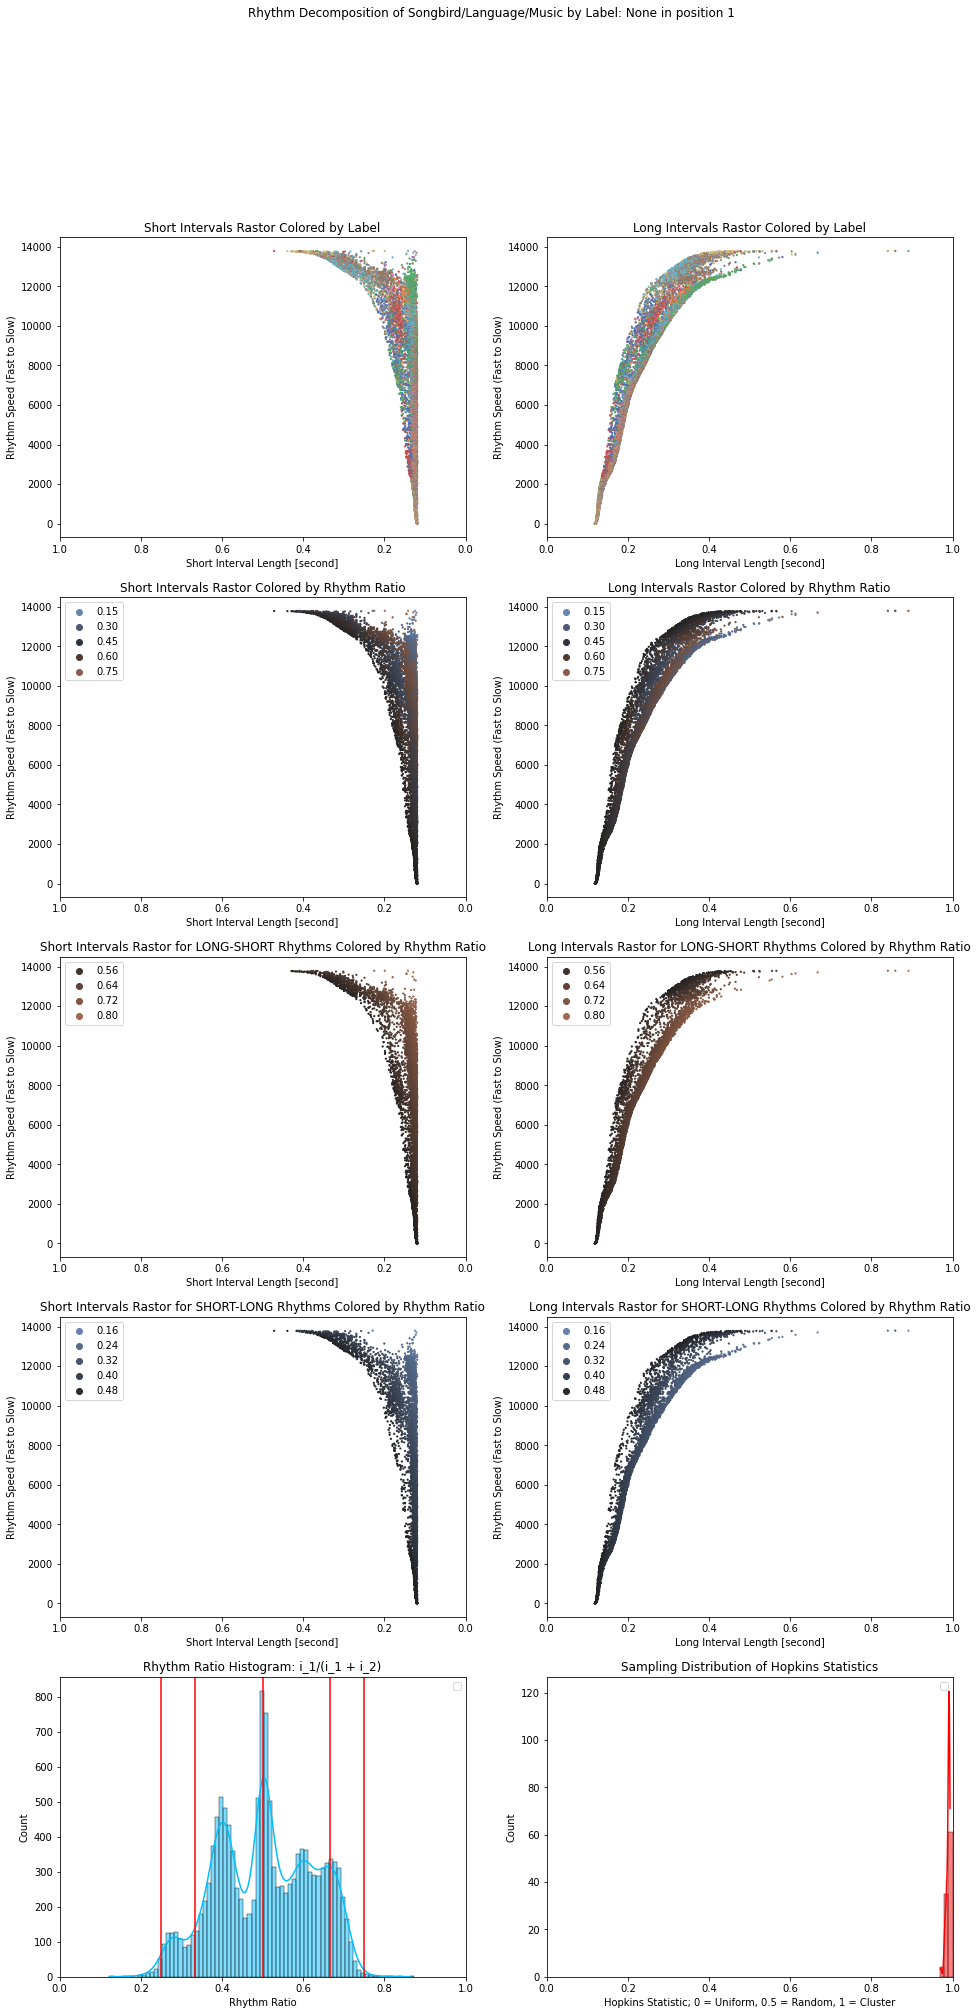

In [11]:
h = rhythm.decompose_rhythm(
    ## Macro controls
    dyadic, 
    label = None, 
    position = 1, 
    hopkins_iteration = 100,
    ## Graph controls
    figsize = (16, 32),
    xlim = (0, 1),
    s_interval = 's_interval',
    l_interval = 'l_interval', 
    cycle_rank = 'cycle_rank',
    marker = '.',
    color = 'black', 
    hue_norm = (0, 1),
    palette = 'deep',
    legend = False, 
    linewidth = 0,
    s = 20,
    s_ratio = 0.04,
    alpha = 1,
    alpha_ratio = 0.25,
    rhythm_ratio = 'ratio_roeske',
    binwidth = 0.01,
    kde = True
)

In [12]:
np.mean(h)

0.9889013905833827

## Calculate Uniform Rhythm
> Uniform rhythm is calculated under the assumption that interval lengths are uniformly distributed between a minimum and maximum interval length.  

In [13]:
import numpy as np
import numpy.random as random
import seaborn as sns

In [14]:
interval_min = np.min([dyadic['intervals1'].values, dyadic['intervals2']])
interval_max = np.max([dyadic['intervals1'].values, dyadic['intervals2']])

In [15]:
interval1_uni = random.uniform(low = interval_min, high = interval_max, size = len(dyadic) * 1000)
interval2_uni = random.uniform(low = interval_min, high = interval_max, size = len(dyadic) * 1000)
uni_ratio = interval1_uni / (interval1_uni + interval2_uni)

<AxesSubplot:ylabel='Count'>

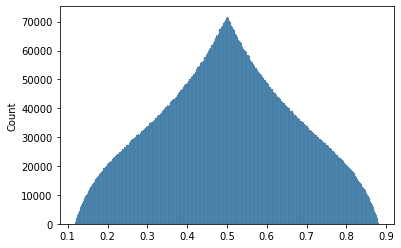

In [16]:
sns.histplot(uni_ratio)

## plot

In [17]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from butcherbird.utils.paths import FIGURE_DIR
import seaborn as sns

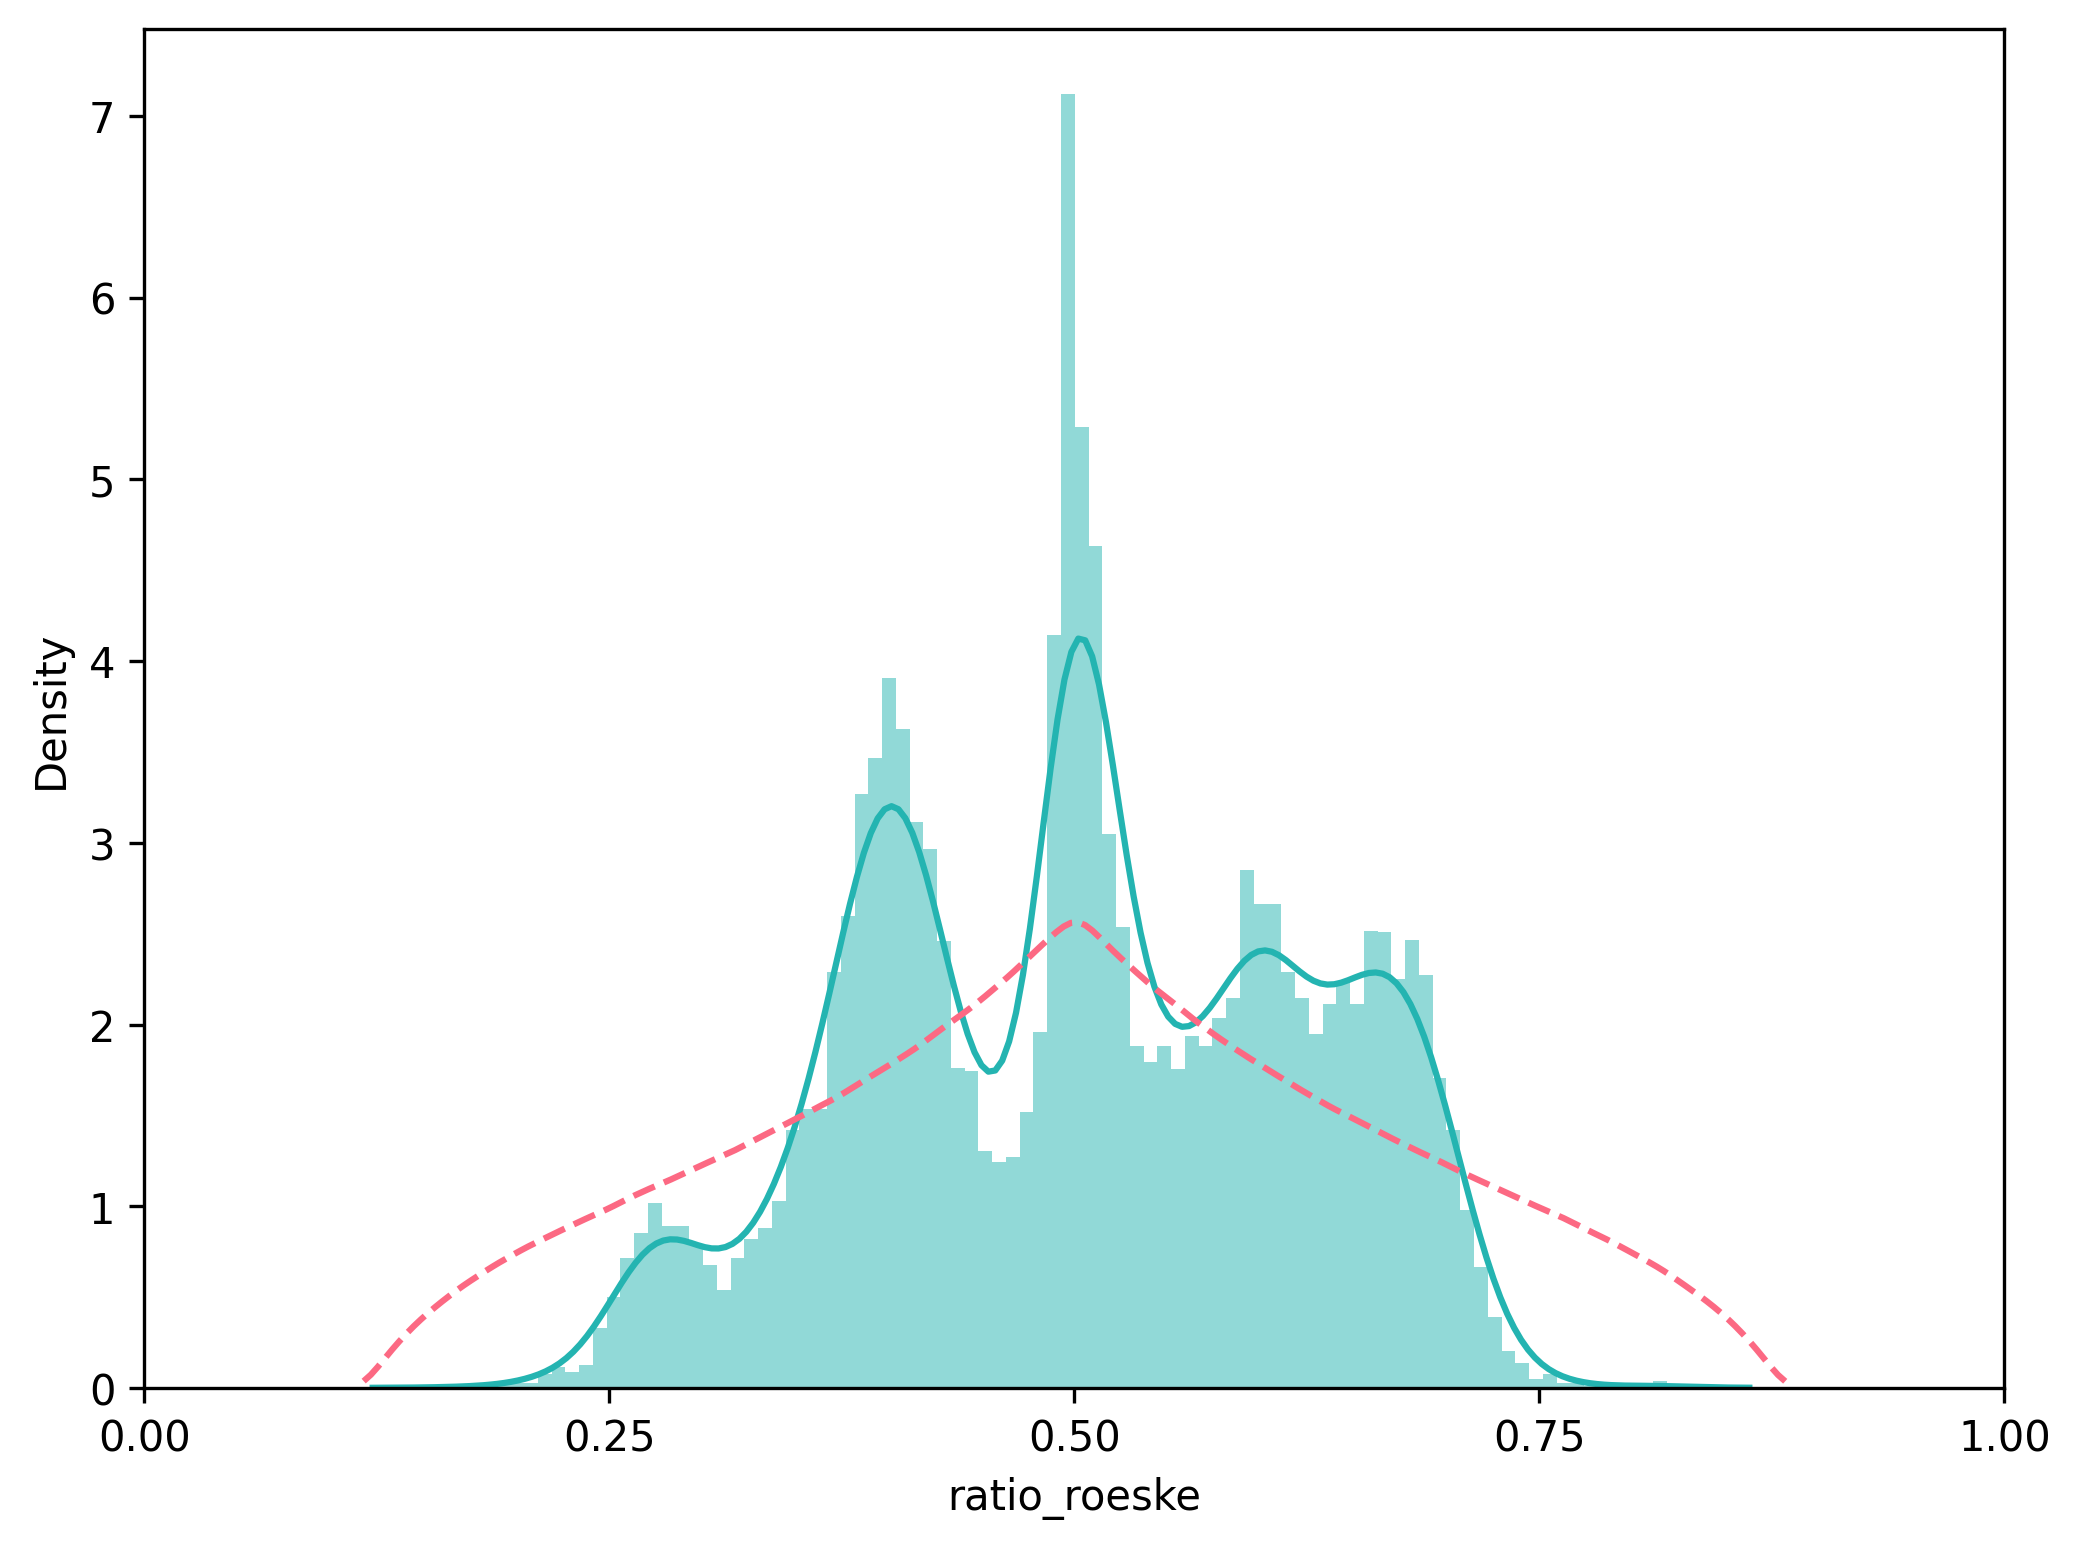

In [18]:
figure(figsize = (8, 6), dpi = 300)

plt.rcParams['patch.edgecolor'] = 'none'

fig = sns.histplot(
    x = dyadic['ratio_roeske'],
    bins = 100,
    stat = 'density',
    color = "#24B4B1",
    kde = True
)

uni = sns.histplot(
    x = uni_ratio,
    stat = 'density',
    alpha = 0,
    bins = 100,
    color = '#FC6983',
    kde = True,
    line_kws = dict(linestyle = 'dashed')
)

ax = plt.gca()
ax.set_xlim([0, 1])
plt.xticks(np.arange(0, 1.25, 0.25))

# save
figname = 'fig1_' + 'lengthcontrol_rhythm_' + indv + '.svg'
plt.savefig(FIGURE_DIR/figname)

## Find Consistent Transitions (Copied from 3.1)

In [19]:
from butcherbird import sequential

In [20]:
import numpy as np

In [21]:
trans_mat = sequential.construct_seq_matrix(note_df, label = 'lasso_labels', sort = False)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72]


In [22]:
## bootstrap null distributions with 100 samples under 0-order syntax assumption

In [23]:
p_container = []

## sample 100 times
for i in np.arange(0, 100):
    
    ## bootstrap one zero-order sequence
    bootstrapped_df = note_df.sample(n = len(note_df), replace = True).reset_index()
    
    ## find the transition matrix of the sequence
    bootstrapped_mat = sequential.construct_seq_matrix(bootstrapped_df, label = 'lasso_labels', sort = False)
    
    ## turn the matrix into long form
    bootstrapped_long = sequential.long_cvtr(bootstrapped_mat, songType = 'Bootstrapped')
    
    ## return bootstrapped distribution of all transition probabilities
    p_container.append(bootstrapped_long.p.values)
    
p_container

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 25 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49
 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 25 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49
 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 25 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49
 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 27 28 29 30 31 32 33 34 35 36 37 38 39 

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 25 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49
 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 4

[array([0.01463415, 0.0195122 , 0.04390244, ..., 0.        , 0.        ,
        0.        ]),
 array([0.02222222, 0.02222222, 0.03555556, ..., 0.        , 0.01123596,
        0.01123596]),
 array([0.00497512, 0.03482587, 0.02487562, ..., 0.02272727, 0.        ,
        0.        ]),
 array([0.01442308, 0.03846154, 0.04807692, ..., 0.        , 0.        ,
        0.        ]),
 array([0.00444444, 0.03111111, 0.03555556, ..., 0.01041667, 0.01041667,
        0.01041667]),
 array([0.0047619 , 0.03809524, 0.04761905, ..., 0.01369863, 0.01369863,
        0.        ]),
 array([0.00961538, 0.04807692, 0.02884615, ..., 0.02061856, 0.        ,
        0.        ]),
 array([0.        , 0.03448276, 0.03940887, ..., 0.        , 0.        ,
        0.00854701]),
 array([0.01793722, 0.03139013, 0.03587444, ..., 0.        , 0.        ,
        0.        ]),
 array([0.00515464, 0.03608247, 0.04123711, ..., 0.        , 0.        ,
        0.        ]),
 array([0.02673797, 0.05347594, 0.04812834, ..., 0

In [24]:
## swap axes so that each element in p_container is a null sampling distribution of 
## find how likely that specific transition happpens with just 0 order syntax

In [25]:
p = np.swapaxes(p_container, 0, 1)

In [26]:
p

array([[0.01463415, 0.02222222, 0.00497512, ..., 0.01075269, 0.01382488,
        0.01395349],
       [0.0195122 , 0.02222222, 0.03482587, ..., 0.03225806, 0.05529954,
        0.01395349],
       [0.04390244, 0.03555556, 0.02487562, ..., 0.05913978, 0.03686636,
        0.04651163],
       ...,
       [0.        , 0.        , 0.02272727, ..., 0.        , 0.01086957,
        0.        ],
       [0.        , 0.01123596, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.01123596, 0.        , ..., 0.        , 0.        ,
        0.01298701]])

In [27]:
import numpy as np
import scipy.stats

## a standard calculation for confidence interval
def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, m-h, m+h

In [28]:
higherconfints = []

for null_transitions in p:
    higherconfints.append(mean_confidence_interval(null_transitions, confidence = 0.95)[2])
    
higherconfints

[0.012759812702167122,
 0.03430260873167964,
 0.04720184805373494,
 0.019124800137357213,
 0.007526422179554302,
 0.004511160374815247,
 0.0080438798675797,
 0.005289978512577939,
 0.018340168490509352,
 0.03990280563021559,
 0.02737289024383495,
 0.019907022425213552,
 0.0091368641095347,
 0.02143692245090326,
 0.018405557136559378,
 0.03080023337517928,
 0.0017099034560874877,
 0.0060338392010675776,
 0.0030197081626691167,
 0.004639842510767951,
 0.0011335125270387327,
 0.0006913570058249754,
 0.006916027955164558,
 0.0010262998982650397,
 0.0,
 0.00484703022879254,
 0.0,
 0.015424070351183624,
 0.014609967200232162,
 0.055621459346075396,
 0.04940260045732872,
 0.007277935063039017,
 0.01732614063988611,
 0.022489613183342864,
 0.04986605908774358,
 0.006164145079466276,
 0.004038005084891111,
 0.0027385471712549113,
 0.005139536564166663,
 0.004862837078006469,
 0.01044419621938144,
 0.00800756779812729,
 0.01100827715217292,
 0.015150723937887557,
 0.042346245926946045,
 0.021989

In [29]:
trans_long = sequential.long_cvtr(trans_mat, songType = 'True')

In [30]:
trans_long

,songType,noteType,markov,p
0,True,0,0,0.004717
1,True,0,1,0.000000
2,True,0,2,0.000000
3,True,0,3,0.004717
4,True,0,4,0.000000
...,...,...,...,...
5324,True,72,68,0.000000
5325,True,72,69,0.010989
5326,True,72,70,0.043956
5327,True,72,71,0.000000


In [31]:
trans_long['higherconfint'] = higherconfints

In [32]:
trans_long

,songType,noteType,markov,p,higherconfint
0,True,0,0,0.004717,0.012760
1,True,0,1,0.000000,0.034303
2,True,0,2,0.000000,0.047202
3,True,0,3,0.004717,0.019125
4,True,0,4,0.000000,0.007526
...,...,...,...,...,...
5324,True,72,68,0.000000,0.007816
5325,True,72,69,0.010989,0.008074
5326,True,72,70,0.043956,0.009125
5327,True,72,71,0.000000,0.005640


In [33]:
filtered_trans_long = trans_long[trans_long.p > trans_long.higherconfint]

In [34]:
filtered_trans_long

,songType,noteType,markov,p,higherconfint
6,True,0,6,0.037736,0.008044
9,True,0,9,0.080189,0.039903
19,True,0,19,0.004717,0.004640
27,True,0,27,0.179245,0.015424
36,True,0,36,0.009434,0.004038
...,...,...,...,...,...
5322,True,72,66,0.032967,0.006631
5323,True,72,67,0.032967,0.013813
5325,True,72,69,0.010989,0.008074
5326,True,72,70,0.043956,0.009125


In [35]:
ftl = filtered_trans_long

In [36]:
## verify rhythm counts above 0.01 of total rhythm count (8013 * 0.01)

In [37]:
verified = []

for index, transition in ftl.iterrows():
    note = transition.noteType
    dest = transition.markov
    
    ## find if dyadic contains enough entries for this particular combination
    first_filter = dyadic[dyadic.label1 == note]
    second_filter = first_filter[first_filter.label2 == dest]
    
    if len(second_filter) > 0.005*len(dyadic):
        verified.append(index)

In [38]:
vr = ftl.filter(items = verified, axis = 0)

In [39]:
unique, counts = np.unique(vr.noteType, return_counts = True)

In [40]:
eligible_notes = []
for noteType, count in zip(unique, counts):
    if count > 1:
        eligible_notes.append(noteType)

In [41]:
eligible_transitions = []

for n in eligible_notes:
    eligible_transitions.append(vr[vr.noteType == n])
    
eligible_transitions = pd.concat(eligible_transitions)

In [42]:
eligible_transitions

,songType,noteType,markov,p,higherconfint
102,True,1,29,0.512963,0.056090
103,True,1,30,0.198148,0.050996
122,True,1,49,0.129630,0.014875
757,True,10,27,0.423163,0.015688
774,True,10,44,0.213808,0.041339
1125,True,15,30,0.185039,0.050433
1143,True,15,48,0.501969,0.025698
2118,True,29,1,0.096878,0.032391
2128,True,29,11,0.207750,0.019326
2129,True,29,12,0.081808,0.007286


In [43]:
import scipy.stats

def bif_rhythm_ks(vd_bif, dyadic, mode = 'ratio_roeske'):
    '''
    Calculate KS test for each bifurcation point
    '''
    
    output = []
    
    # 1. Extract Bifurcation Info from vd_bif
    ### a. Find all pre-bifurcation notes
    pre_bif = np.unique(vd_bif['noteType'])
    
    # 2. For each bifurcation, conduct a Kolmogorov-Smirnov test
    ### a. for each bifurcation
    for note in pre_bif:
        ### a. Query its exact slice
        bif_df = vd_bif[vd_bif['noteType'] == note]
        ### b. Query its bifurcation destinations (assumes only 2)
        t1 = bif_df['markov'].values[0]
        t2 = bif_df['markov'].values[1]
        ### c. Filter dyadic by pre_bif
        note_df = dyadic[dyadic['label1'] == note]
        ### d. Filter note_df by bif destinations
        t1_df = note_df[note_df['label2'] == t1]
        t2_df = note_df[note_df['label2'] == t2]
        ### e. compute ks
        try:
            ks = scipy.stats.ks_2samp(t1_df[mode], t2_df[mode])
        except:
            ks = [None, None]
            print('ks not computed')
        ### e. feeds out pandas
        output.append(
            pd.DataFrame(
                {
                    'pre_bif': [note],
                    'bif_des': [(t1, t2)],
                    'bif_prof': [
                        (
                            bif_df['p'].values[0],
                            bif_df['p'].values[1]
                        )
                    ],
                    'rhy_cnts': [
                        (
                            len(t1_df),
                            len(t2_df)
                        )
                    ],
                    'ks_statistic': [ks[0]],
                    'ks_p': [ks[1]]
                }
            )
        )
        
        print('Finished querying bifurcation with pre_bif ', note)
    return pd.concat(output)

In [44]:
entangle = bif_rhythm_ks(eligible_transitions, dyadic)

Finished querying bifurcation with pre_bif  1
Finished querying bifurcation with pre_bif  10
Finished querying bifurcation with pre_bif  15
Finished querying bifurcation with pre_bif  29
Finished querying bifurcation with pre_bif  30
Finished querying bifurcation with pre_bif  34
Finished querying bifurcation with pre_bif  44
Finished querying bifurcation with pre_bif  47
Finished querying bifurcation with pre_bif  50
Finished querying bifurcation with pre_bif  58


In [45]:
entangle

,pre_bif,bif_des,bif_prof,rhy_cnts,ks_statistic,ks_p
0,1,"(29, 30)","(0.512962962962963, 0.19814814814814816)","(277, 107)",0.337393,2.565091e-08
0,10,"(27, 44)","(0.42316258351893093, 0.21380846325167038)","(190, 96)",0.853399,6.047969e-49
0,15,"(30, 48)","(0.18503937007874016, 0.5019685039370079)","(94, 255)",0.158782,5.486849e-02
0,29,"(1, 11)","(0.0968783638320775, 0.2077502691065662)","(89, 189)",0.506272,1.021627e-14
0,30,"(1, 13)","(0.11016949152542373, 0.09806295399515738)","(91, 81)",0.976665,7.793106e-47
0,34,"(44, 57)","(0.26889714993804215, 0.16480793060718713)","(217, 133)",0.348533,2.053397e-09
0,44,"(1, 2)","(0.1362962962962963, 0.2740740740740741)","(88, 185)",0.266585,3.107945e-04
0,47,"(44, 45)","(0.5105740181268882, 0.24169184290030213)","(169, 71)",0.673223,3.120635e-22
0,50,"(14, 51)","(0.1766304347826087, 0.3804347826086957)","(130, 222)",0.822453,7.440961e-57
0,58,"(8, 50)","(0.41379310344827586, 0.3630831643002028)","(202, 173)",0.623734,1.443301e-34


In [46]:
entangle['ks_p'] < 0.05

0     True
0     True
0    False
0     True
0     True
0     True
0     True
0     True
0     True
0     True
Name: ks_p, dtype: bool

In [47]:
## do a shuffle
dyadic_shuffle = dyadic.copy(deep = True)
np.random.shuffle(dyadic_shuffle['ratio_roeske'].values)
entangle = bif_rhythm_ks(eligible_transitions, dyadic_shuffle)

Finished querying bifurcation with pre_bif  1
Finished querying bifurcation with pre_bif  10
Finished querying bifurcation with pre_bif  15
Finished querying bifurcation with pre_bif  29
Finished querying bifurcation with pre_bif  30
Finished querying bifurcation with pre_bif  34
Finished querying bifurcation with pre_bif  44
Finished querying bifurcation with pre_bif  47
Finished querying bifurcation with pre_bif  50
Finished querying bifurcation with pre_bif  58


In [48]:
entangle

,pre_bif,bif_des,bif_prof,rhy_cnts,ks_statistic,ks_p
0,1,"(29, 30)","(0.512962962962963, 0.19814814814814816)","(277, 107)",0.150444,0.053647
0,10,"(27, 44)","(0.42316258351893093, 0.21380846325167038)","(190, 96)",0.145175,0.119604
0,15,"(30, 48)","(0.18503937007874016, 0.5019685039370079)","(94, 255)",0.082103,0.705000
0,29,"(1, 11)","(0.0968783638320775, 0.2077502691065662)","(89, 189)",0.092087,0.641485
0,30,"(1, 13)","(0.11016949152542373, 0.09806295399515738)","(91, 81)",0.105006,0.679313
0,34,"(44, 57)","(0.26889714993804215, 0.16480793060718713)","(217, 133)",0.067184,0.820329
0,44,"(1, 2)","(0.1362962962962963, 0.2740740740740741)","(88, 185)",0.116892,0.354339
0,47,"(44, 45)","(0.5105740181268882, 0.24169184290030213)","(169, 71)",0.092258,0.744957
0,50,"(14, 51)","(0.1766304347826087, 0.3804347826086957)","(130, 222)",0.113652,0.218602
0,58,"(8, 50)","(0.41379310344827586, 0.3630831643002028)","(202, 173)",0.096434,0.322462


# Compute Global Statistic

The concept of the global statistic here is to compare the rhythm ratios for each first-order syntax and to compare between-group variation / within-group variation. 

1. Find each first-order transition -> z-score -> compile all first-order transition -> MSE
2. Compare with zero-order transition -> z-score -> compile all first-order transition -> MSE
3. Is first-order transition variance is lower than zero-order transition variance?

## Let's find all the first-order transitions first

In [49]:
import scipy.stats as stats

In [50]:
def syntactic_rhythmic_modulation_metric (dyadic):
    
    ## compute global metric
    
    first_order_rhythms_centered = []
    first_order_group_n = 0

    ## for every possible label
    for label in np.unique(dyadic['label1']):

        ## find a sub dataframe containing only designated zero-order label
        zero_order = dyadic[dyadic['label1'] == label]

        ## for every possible transition of that label
        for transition in np.unique(zero_order['label2']):

            ## find its rhythms
            first_order = zero_order[zero_order['label2'] == transition]
            first_order_rhythms = first_order['ratio_roeske'].values
            first_order_rhythms_centered.extend(first_order_rhythms - np.mean(first_order_rhythms))

            ## add 1 to group_n
            first_order_group_n+=1
    
    # find MSE
    MSE_first = sum(np.square(first_order_rhythms_centered)) / len(dyadic)
    MSE_baseline = sum(np.square(dyadic['ratio_roeske'].values - np.mean(dyadic['ratio_roeske']))) / len(dyadic)
    
    return 1 - MSE_first / MSE_baseline

## empirical 

In [51]:
syntactic_rhythmic_modulation_metric(dyadic)

0.9082267514681188

## Find Baseline using bootstrap

In [52]:
from tqdm.autonotebook import tqdm

In [53]:
dyadic_shuffle = dyadic.copy(deep = True)

SDoMSE = []

for sample in tqdm(np.arange(0, 100)):
    
    ## shuffle dyadic
    np.random.shuffle(dyadic_shuffle['ratio_roeske'].values)
    
    SDoMSE.append(syntactic_rhythmic_modulation_metric(dyadic_shuffle))

  0%|          | 0/100 [00:00<?, ?it/s]

In [54]:
mean_confidence_interval(SDoMSE, confidence=0.95)

(0.06824728159604987, 0.06773022711559137, 0.06876433607650836)

In [55]:
syntactic_rhythmic_modulation_metric(dyadic)

0.9082267514681188

## try using anova

In [56]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [57]:
dyadic = dyadic.astype({'label1': str, 'label2': str})

In [58]:
model = ols('ratio_roeske ~ label1', data = dyadic).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
label1,124.311332,68.0,367.282032,0.0
Residual,68.319726,13726.0,NaN,NaN


In [59]:
dyadic['transition'] = dyadic['label1'] + '+' + dyadic['label2']

In [60]:
dyadic

,intervals1,intervals2,label1,label2,label3,s_interval,l_interval,cycle_dur,ratio_roeske,ratio_custom,cycle_rank,transition
9579,0.118994,0.118994,57,48,43,0.118994,0.118994,0.237989,0.500000,1.000000,6,57+48
6572,0.118994,0.118994,14,48,25,0.118994,0.118994,0.237989,0.500000,1.000000,6,14+48
1010,0.118994,0.118994,30,48,2,0.118994,0.118994,0.237989,0.500000,1.000000,6,30+48
3931,0.118994,0.118994,65,49,10,0.118994,0.118994,0.237989,0.500000,1.000000,6,65+49
3332,0.118994,0.118994,2,48,2,0.118994,0.118994,0.237989,0.500000,1.000000,6,2+48
...,...,...,...,...,...,...,...,...,...,...,...,...
12317,0.891355,0.141711,42,12,28,0.141711,0.891355,1.033066,0.862825,0.158984,13791,42+12
8825,0.858994,0.198994,51,9,55,0.198994,0.858994,1.057989,0.811913,0.231660,13792,51+9
5972,0.840717,0.225005,40,15,48,0.225005,0.840717,1.065722,0.788871,0.267634,13793,40+15
5971,0.228945,0.840717,62,40,15,0.228945,0.840717,1.069663,0.214035,0.272322,13794,62+40


In [61]:
model = ols('ratio_roeske ~ transition', data = dyadic).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
transition,174.952680,940.0,135.3283,0.0
Residual,17.678378,12854.0,NaN,NaN
